In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
data = pd.read_csv('house-votes-84.data.csv', header = None)
data = data.replace('y', 1)
data = data.replace('n', 0)

for column in data.columns[:-2]:
    data[column] = data[column].replace('?', np.mean(data[column][data[column] != '?']))
    
data[16] = data[16].apply(lambda x: x.replace('.', ''))

In [154]:
from sklearn.cross_validation import train_test_split

X, y = data[data.columns[:-2]], data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=4444)

In [155]:
from sklearn import neighbors, metrics

best_score = 0
best_neighbor = 0
for i in range(1, 21):
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)
    score = metrics.accuracy_score(y_test, knn_clf.predict(X_test))
    if score > best_score:
        best_score = score
        best_neighbor = i
        
print 'The best neighbor is %r' %best_score + ' the best neighbor is %r' %best_neighbor

The best neighbor is 0.93129770992366412 the best neighbor is 5


In [156]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_acc = metrics.accuracy_score(y_test, log_clf.predict(X_test))
print 'Accuracy Score is %r' %log_acc

Accuracy Score is 0.93893129770992367


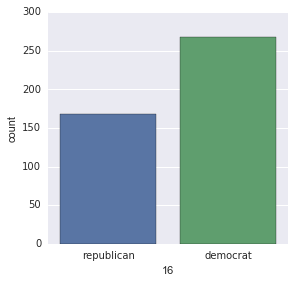

In [157]:
import seaborn as sns
_ = sns.factorplot(16, data = data, kind = 'count')

In [158]:
y_pred = ['democrat' for i in range(len(X))]
always_dem = metrics.accuracy_score(y, y_pred)
print always_dem

0.613793103448


In [159]:
y_pred = ['republican' for i in range(len(X))]
always_rep = metrics.accuracy_score(y, y_pred)
print always_rep

0.386206896552


In [160]:
scores = {}
for i in range(1, 21):
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)
    scores[i] =  metrics.accuracy_score(y_test, knn_clf.predict(X_test))

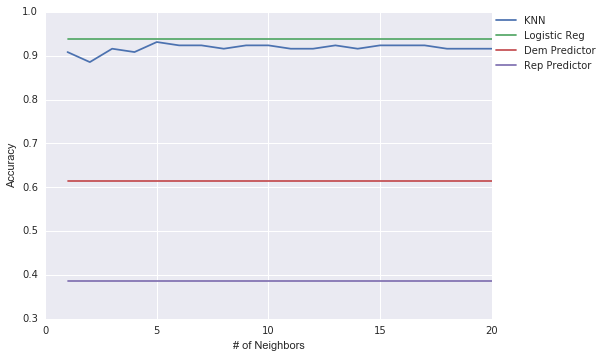

In [161]:
plt.plot(scores.keys(), scores.values(), label='KNN')
plt.plot(range(1,21), [log_acc for i in range(1,21)], label='Logistic Reg')
plt.plot(range(1,21), [always_dem for i in range(1,21)], label='Dem Predictor')
plt.plot(range(1,21), [always_rep for i in range(1,21)], label='Rep Predictor')

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Accuracy')
plt.xlabel('# of Neighbors')
plt.show()


In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.learning_curve import learning_curve

bayes_clf =GaussianNB()
bayes_learning_curve = learning_curve(bayes_clf,X,y,train_sizes=[3,6,10],cv=3)